## Undersampling logloss

1000
0.146658 0.156737


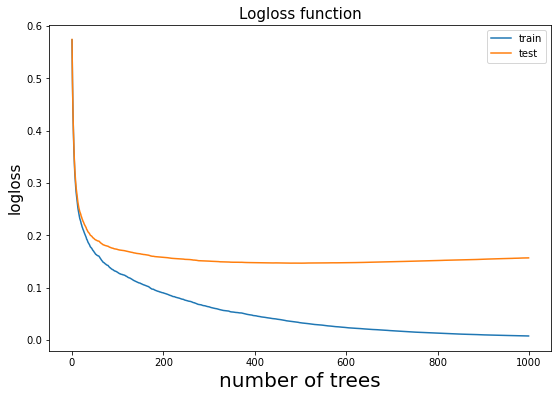

In [19]:
import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import functions as fc
from xgboost import XGBClassifier







model = XGBClassifier()
model.load_model("/work/aavocone/models/under_3_0_n1000.txt")
print(model.best_ntree_limit)


loss_0 = model.evals_result()["validation_0"]["logloss"]
loss_1 = model.evals_result()["validation_1"]["logloss"]
plt.figure(figsize=(9,6))
x = range(len(loss_1))
plt.plot(x,loss_0, label = "train")
plt.plot(x,loss_1, label = "test")
plt.xlabel("number of trees", fontsize = 20)
plt.ylabel("logloss",fontsize=15)
plt.title(f"Logloss function", fontsize = 15)
plt.legend()

print(min(loss_1), loss_1[-1])

# Comparing different model500 and model1000

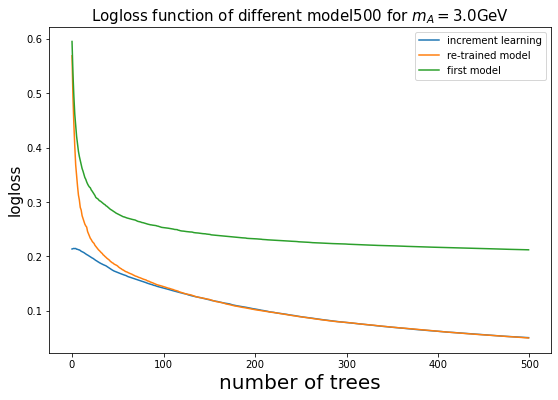

0.050653 0.050068 0.212149


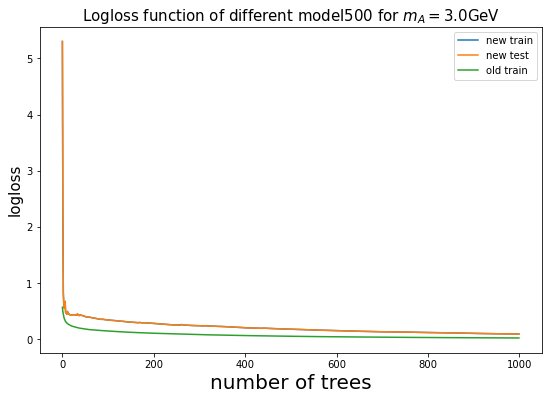

0.092854 0.092854 0.021798


In [25]:
model = XGBClassifier()
model.load_model("/work/aavocone/models/3_0_model500_increment_learning.txt")
loss_0 = model.evals_result()["validation_0"]["logloss"]

model.load_model("/ceph/aavocone/models/3_0_model500.txt")
loss_1 = model.evals_result()["validation_0"]["logloss"]

model.load_model("/work/aavocone/models/model500.txt")
loss_2 = model.evals_result()["validation_0"]["logloss"]


plt.figure(figsize=(9,6))
x = range(len(loss_1))
plt.plot(x,loss_0, label = "increment learning")
plt.plot(x,loss_1, label = "re-trained model")
plt.plot(x,loss_2, label = "first model")
plt.xlabel("number of trees", fontsize = 20)
plt.ylabel("logloss",fontsize=15)
plt.title(f"Logloss function of different model500 for $m_A = 3.0$GeV", fontsize = 15)
plt.legend()
plt.savefig(f"/work/aavocone/week9/compare_model500.pdf", format="pdf",bbox_inches="tight")
plt.show()
print(min(loss_0), min(loss_1),min(loss_2))

model.load_model("/ceph/aavocone/models/3_0_model1000_validation.txt")
loss_0 = model.evals_result()["validation_0"]["logloss"]
loss_1 = model.evals_result()["validation_0"]["logloss"]

model.load_model("/ceph/aavocone/models/3_0_model1000.txt")
loss_2 = model.evals_result()["validation_0"]["logloss"]


plt.figure(figsize=(9,6))
x = range(len(loss_1))
plt.plot(x,loss_0, label = "new train")
plt.plot(x,loss_1, label = "new test")
plt.plot(x,loss_2, label = "old train")
plt.xlabel("number of trees", fontsize = 20)
plt.ylabel("logloss",fontsize=15)
plt.title(f"Logloss function of different model500 for $m_A = 3.0$GeV", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week9/compare_model500.pdf", format="pdf",bbox_inches="tight")
plt.show()
print(min(loss_0), min(loss_1),min(loss_2))






# overview logloss

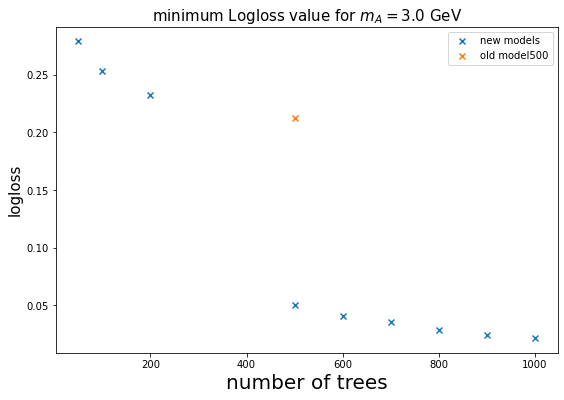

In [36]:
path = "/ceph/aavocone/models/"


names = []
train_loss = []
val_loss = []

for files in os.listdir(path):
    if files[0] == "3" and files[-5] == "0":
        model = XGBClassifier()
        model.load_model(f"{path}{files}")
        loss_0 = model.evals_result()["validation_0"]["logloss"]
        names.append(files[9:-4])
        train_loss.append(min(loss_0))

    else:
        pass


names = list(map(int,names))

model.load_model("/work/aavocone/models/model500.txt")
LOSS = loss = model.evals_result()["validation_0"]["logloss"]

plt.figure(figsize=(9,6))
x = range(len(loss))
plt.scatter(names, train_loss, marker= "x", label = "new models")
plt.scatter(500,LOSS[-1], marker ="x", label="old model500")
plt.xlabel("number of trees", fontsize = 20)
plt.ylabel("logloss",fontsize=15)
plt.title("minimum Logloss value for $m_{A} = 3.0$ GeV", fontsize = 15)
plt.legend()
plt.savefig(f"/work/aavocone/week9/log_loss_overview.pdf", format="pdf",bbox_inches="tight")
plt.show()

In [9]:
import numpy as np
x = np.random.randint(10,size = 20)/10
y = np.array(x >= 0.5, dtype = int)
print(sum(y)/len(y))

0.65


In [10]:
plt.figure(figsize=(9,6))
plt.plot(FP[0], TP[0], label = f"n = {names[0]}, auc = {AUC[0]:.3f}", color ="orange")
plt.plot(FP[0], TP[0], label = f"n = {names[0]}, auc = {AUC[0]:.3f}", color ="goldenrod")
plt.plot(FP[0], TP[0], label = f"n = {names[0]}, auc = {AUC[0]:.3f}", color ="red")
plt.plot(FP[0], TP[0], label = f"n = {names[0]}, auc = {AUC[0]:.3f}", color ="darkred")
plt.title(f"ROC curve comparison for $m_A = 3.0\:$ GeV", fontsize = 15)
plt.xlabel("FP rate ", fontsize = 20)
plt.ylabel("TP rate ", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week5/large_ROC_comparison.pdf", format="pdf",bbox_inches="tight")
plt.show()

NameError: name 'plt' is not defined